<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/klasifikasi_heartdesease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Penyakit Jantung

Di bawah ini adalah proses klasifikasi penyakit jantung dari suatu dataset. Proses klasifikasi dilakukan dengan beberapa model terhadap beberapa variabel seperti usia, jenis kelamin, tipe sakit dada, tekanan darah diastol dan lain-lain. Setelah melakukan klasifikasi terhadap model, maka akan ada proses prediksi dari beberapa parameter atau variabel yang diinput

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Informasi data
Terdapat 303 observasi dan 14 kolom pada dataset

> Data pasien

age = umur pasien

sex = jenis kelamin (1 = male, 0 = female)

cp = chest pain type (jenis sakit dada)


0.   Asymptomatic (tanpa gejala)
1.   Atypical angina
2. Non-anginal pain
3. Typical angina

trestbps = resting blood pressure (tekanan darah diastol)

chol     = serum cholestoral in mg/dl (kolesterol serum dalam mg/dl)

fbs     = fasting blood sugar > 120 mg/dl (nilai gula darah saat puasa)

restecg = resting electrocardiographic results (hasil elektrokardiografi saat istirahat)

    Nilai 0: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes
    Nilai 1: normal
    Nilai 2: memiliki kelainan gelombang ST-T (pembalikan gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)

thalach = maximum heart rate achieved (detak jantung maksimum permenit)

exang   = exercise induced angina (angina terinduksi saat olahraga)

oldpeak = ST depression induced by exercise relative to rest (tingkat depresi yang disebabkan oleh olahraga relatif terhadap istirahat)

slope   = the slope of the peak exercise ST segment (kemiringan segmen ST saat olahraga, 'ST' berhubungan dengan posisi pada plot EKG)

ca      = number of major vessels (0-3) colored by flourosopy (jumlah vessel)

thal    = Thalassemia ; 3 = normal; 6 = cacat tetap ; 7 = cacat tidak tetap


> Deteksi

target = 1 positif , 0 negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualisasi data

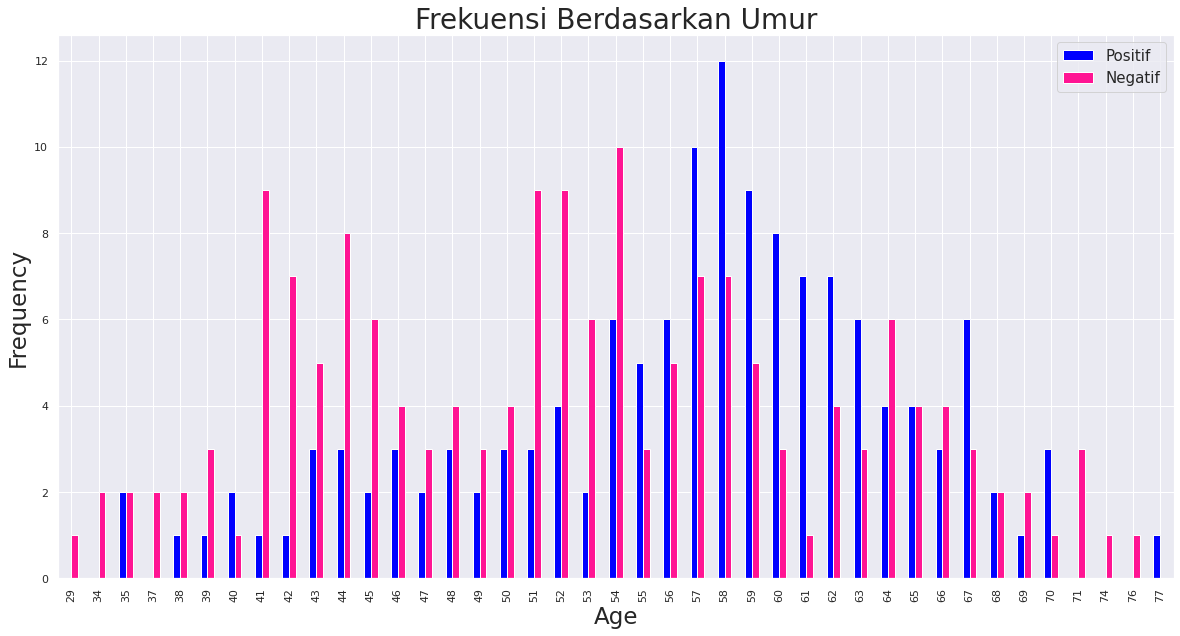

In [5]:
sns.set()
pd.crosstab(df.age , df.target).plot(kind = 'bar', figsize = (20,10), color=['blue','deeppink'])
plt.title('Frekuensi Berdasarkan Umur', fontsize = 28)
plt.xlabel('Age', fontsize = 23)
plt.ylabel('Frequency', fontsize = 23)
plt.legend(labels=['Positif','Negatif'],fontsize=15)
plt.show()

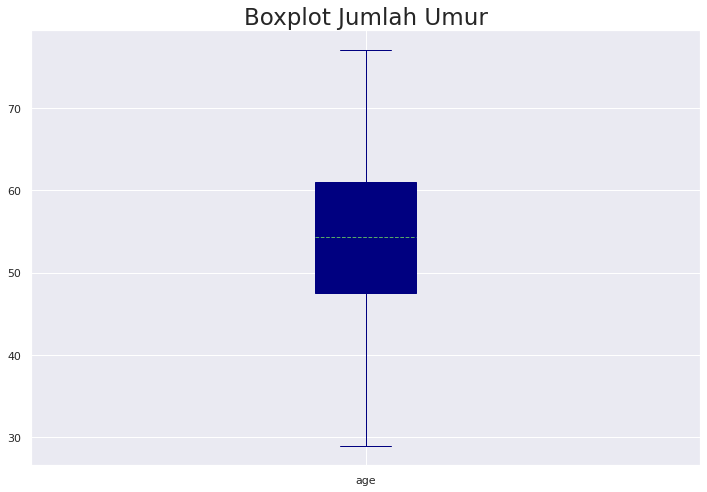

In [ ]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['age'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Jumlah Umur', fontsize=23)
plt.show()

In [ ]:
sex_count = df['sex'].value_counts()
print(sex_count)

1    207
0     96
Name: sex, dtype: int64


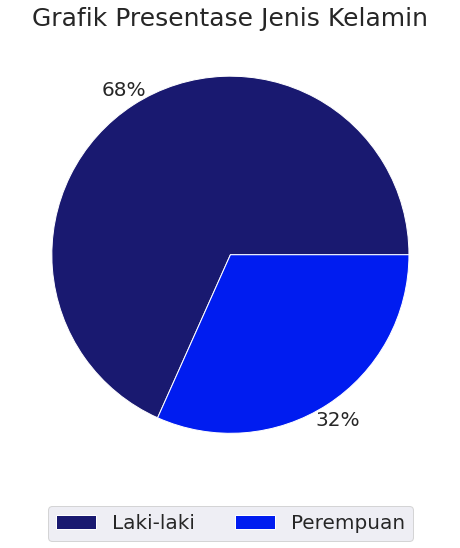

In [ ]:
plt.figure(figsize=(8,9))
plt.pie(sex_count, colors=['#191970', '#001CF0'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Jenis Kelamin',fontsize=25)
plt.legend(labels=['Laki-laki','Perempuan'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

In [ ]:
cp_count = df['cp'].value_counts()
print(cp_count)

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


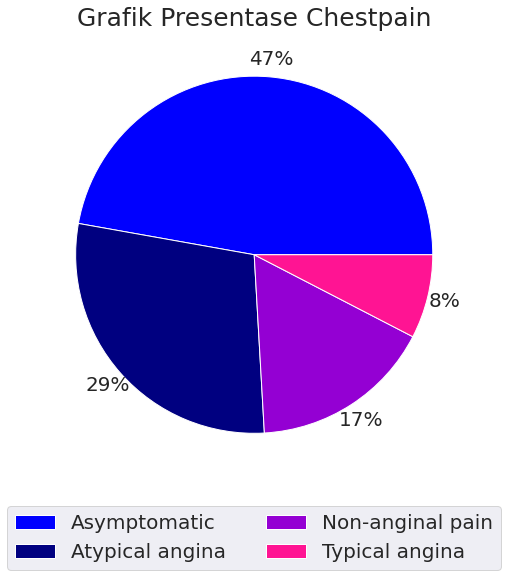

In [ ]:
plt.figure(figsize=(8,9))
plt.pie(cp_count, colors=['blue', 'navy','darkviolet','deeppink'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Chestpain',fontsize=25)
plt.legend(labels=['Asymptomatic','Atypical angina','Non-anginal pain','Typical angina'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

In [ ]:
sns.set()
pd.crosstab(df.age , df.target).plot(kind = 'bar', figsize = (20,10), color=['blue','deeppink'])
plt.title('Frekuensi berdasarkan umur', fontsize = 28)
plt.xlabel('Age', fontsize = 23)
plt.ylabel('Frequency', fontsize = 23)
plt.legend(labels=['Positif','Negatif'],fontsize=15)
plt.show()

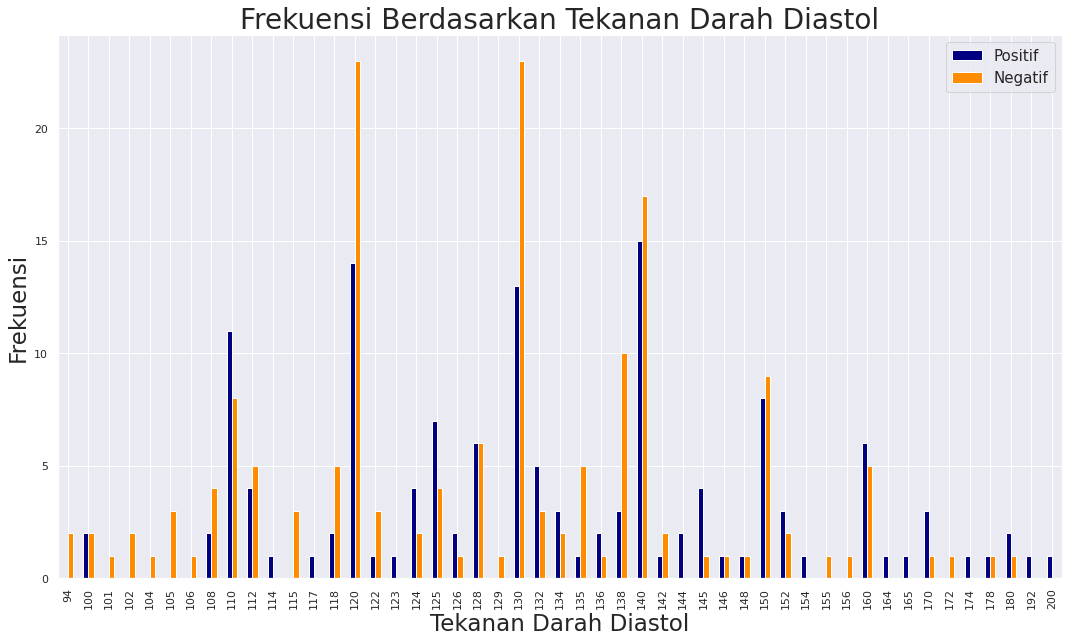

In [55]:
sns.set()
pd.crosstab(df.trestbps , df.target).plot(kind = 'bar', figsize = (18,10), color=['navy','darkorange'])
plt.title('Frekuensi Berdasarkan Tekanan Darah Diastol', fontsize = 28)
plt.xlabel('Tekanan Darah Diastol', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.legend(labels=['Positif','Negatif'],fontsize=15)
plt.show()

In [56]:
# seleksi data positif
positif = df[df['target'] ==1]
positif

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


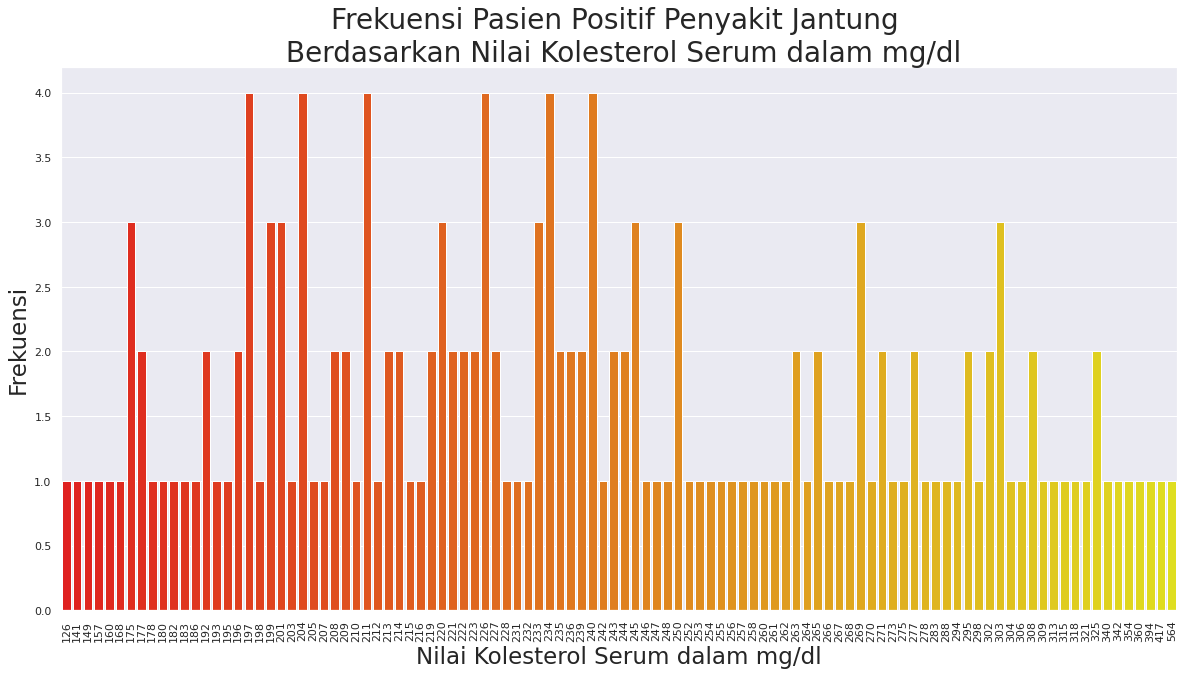

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(x='chol',data=positif,palette='autumn')
plt.xticks(rotation=90)
plt.title('Frekuensi Pasien Positif Penyakit Jantung \n Berdasarkan Nilai Kolesterol Serum dalam mg/dl', fontsize = 28)
plt.xlabel('Nilai Kolesterol Serum dalam mg/dl', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.show()

In [59]:
# seleksi data negatif
negatif = df[df['target'] ==0]

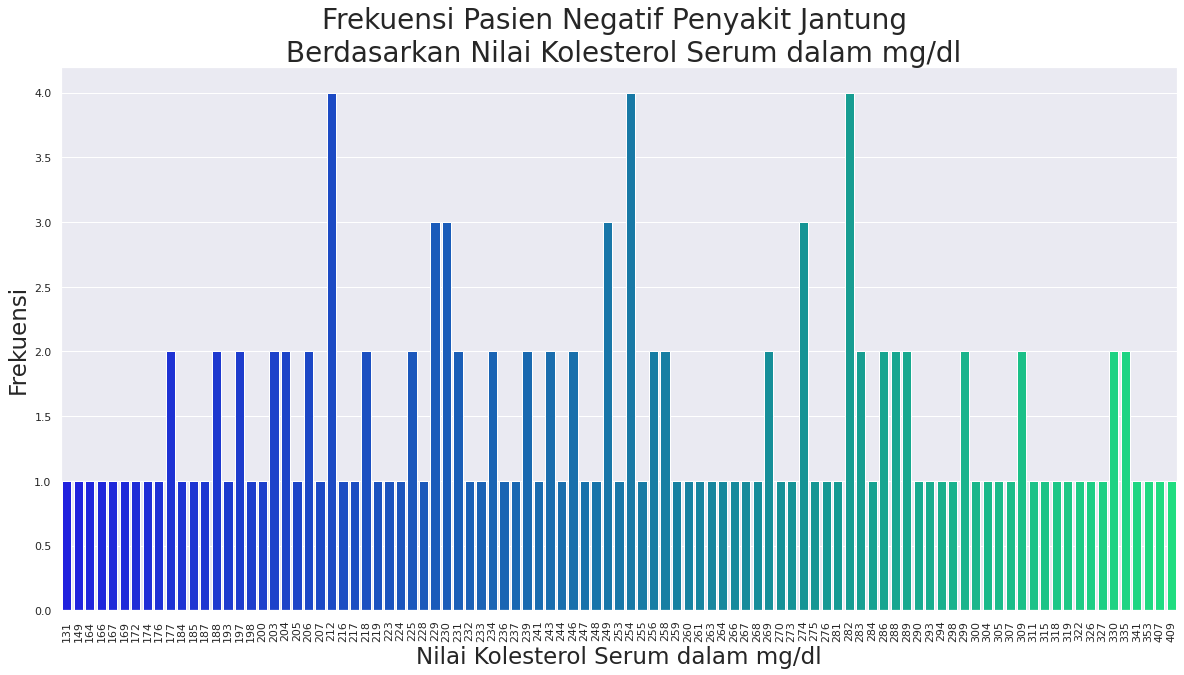

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(x='chol',data=negatif,palette='winter')
plt.xticks(rotation=90)
plt.title('Frekuensi Pasien Negatif Penyakit Jantung \n Berdasarkan Nilai Kolesterol Serum dalam mg/dl', fontsize = 28)
plt.xlabel('Nilai Kolesterol Serum dalam mg/dl', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.show()

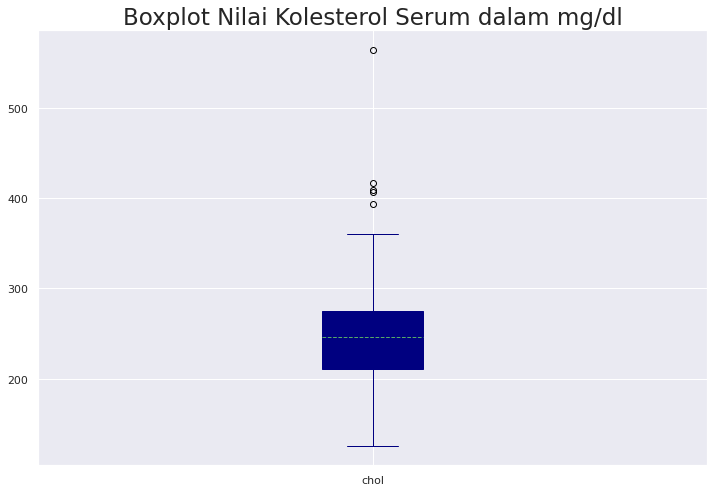

In [61]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['chol'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Kolesterol Serum dalam mg/dl', fontsize=23)
plt.show()

In [ ]:
fbs_count = df['fbs'].value_counts()
print(fbs_count)

0    258
1     45
Name: fbs, dtype: int64


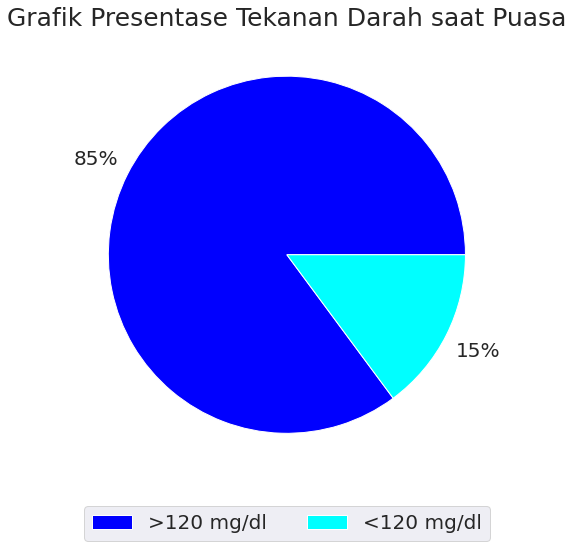

In [ ]:
plt.figure(figsize=(8,9))
plt.pie(fbs_count, colors=['blue','cyan'], autopct='%1.0f%%',pctdistance=1.2,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Tekanan Darah saat Puasa',fontsize=25)
plt.legend(labels=['>120 mg/dl','<120 mg/dl'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

In [ ]:
restecg_count = df['restecg'].value_counts()
print(restecg_count)

1    152
0    147
2      4
Name: restecg, dtype: int64


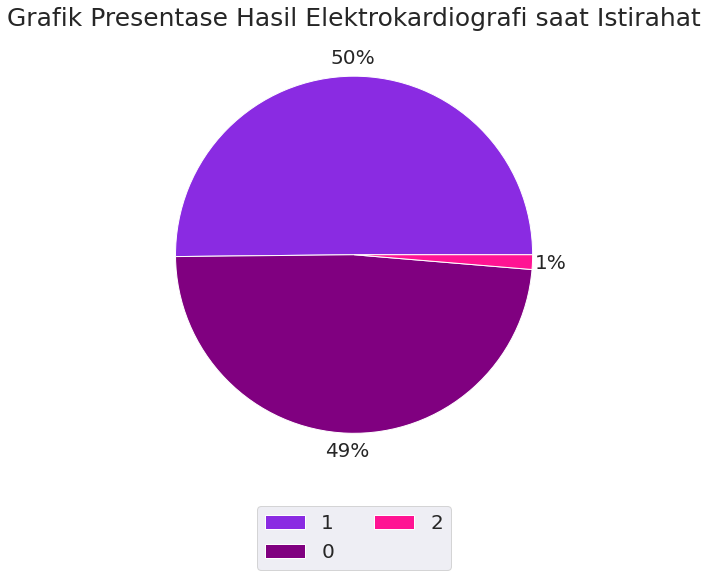

In [ ]:
plt.figure(figsize=(8,9))
plt.pie(restecg_count, colors=['blueviolet','purple','deeppink'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Hasil Elektrokardiografi saat Istirahat',fontsize=25)
plt.legend(labels=['1','0','2'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

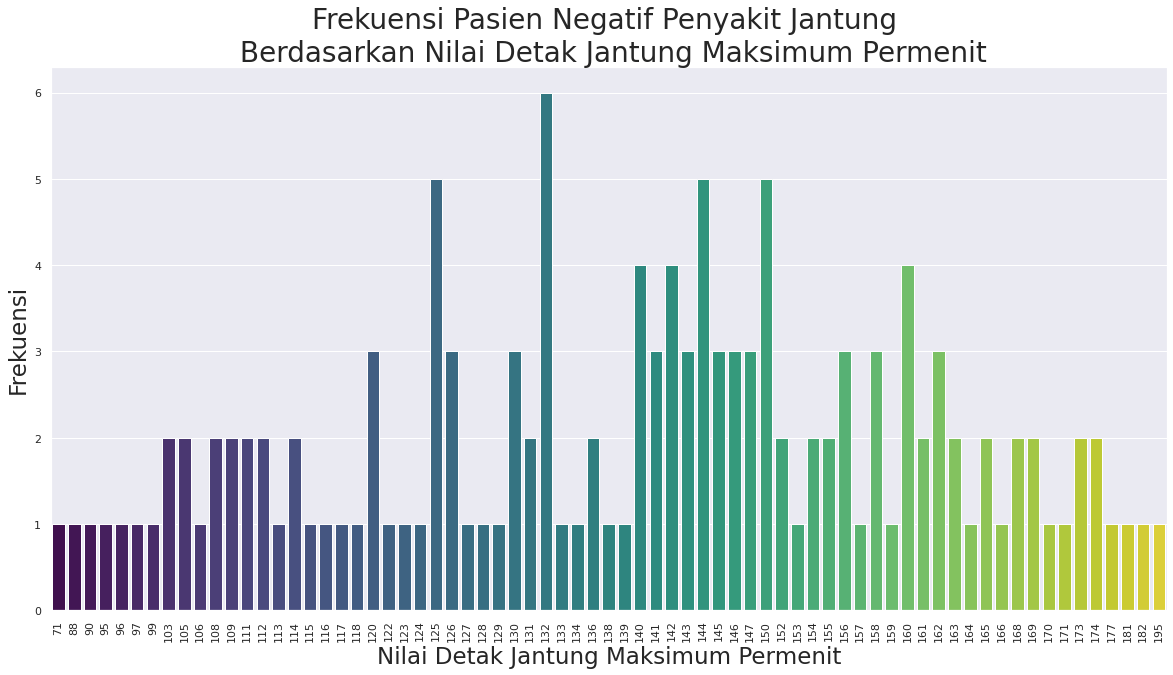

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(x='thalach',data=negatif,palette='viridis')
plt.xticks(rotation=90)
plt.title('Frekuensi Pasien Negatif Penyakit Jantung \n Berdasarkan Nilai Detak Jantung Maksimum Permenit', fontsize = 28)
plt.xlabel('Nilai Detak Jantung Maksimum Permenit', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.show()

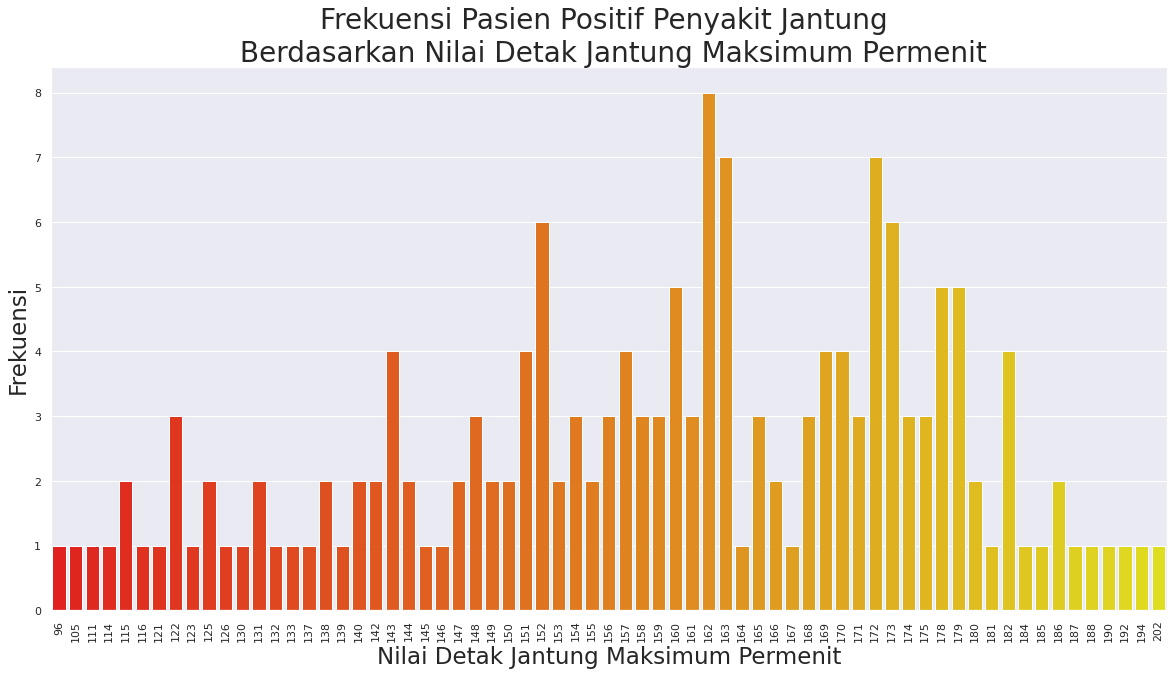

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(x='thalach',data=positif,palette='autumn')
plt.xticks(rotation=90)
plt.title('Frekuensi Pasien Positif Penyakit Jantung \n Berdasarkan Nilai Detak Jantung Maksimum Permenit', fontsize = 28)
plt.xlabel('Nilai Detak Jantung Maksimum Permenit', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.show()

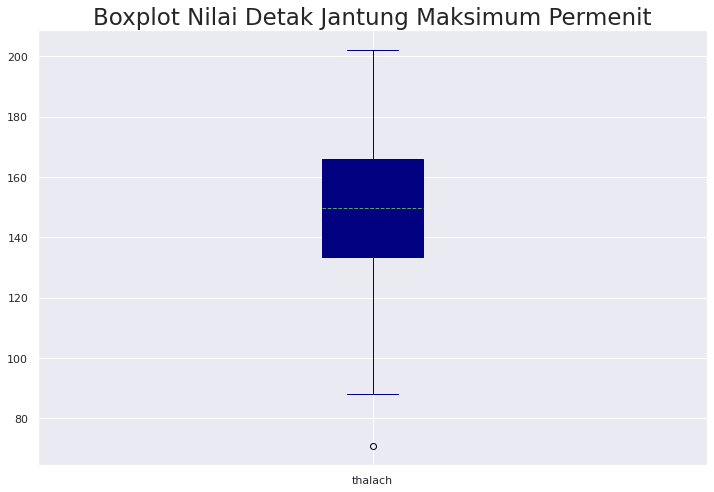

In [65]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['thalach'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Detak Jantung Maksimum Permenit', fontsize=23)
plt.show()

In [66]:
exang_count = df['exang'].value_counts()
print(exang_count)

0    204
1     99
Name: exang, dtype: int64


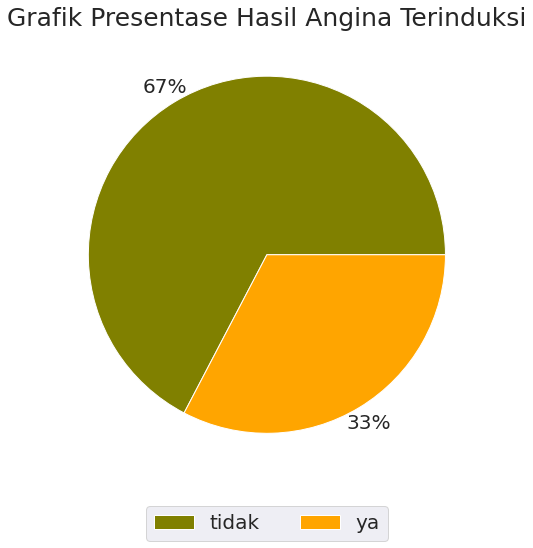

In [67]:
plt.figure(figsize=(8,9))
plt.pie(exang_count, colors=['olive','orange'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Hasil Angina Terinduksi',fontsize=25)
plt.legend(labels=['tidak','ya'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

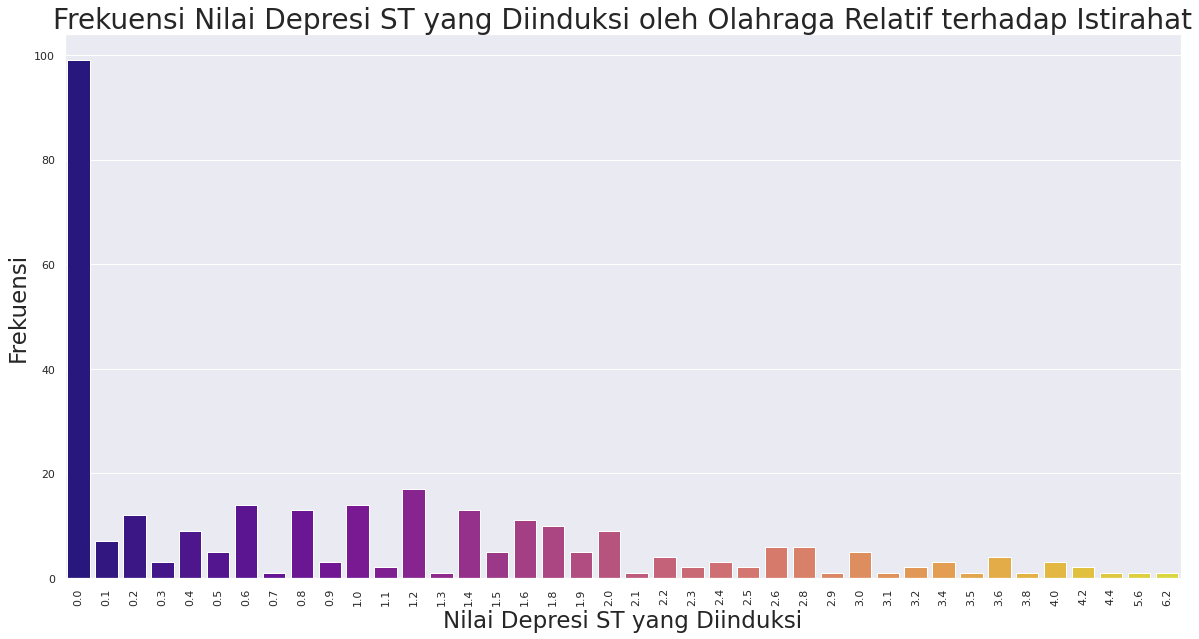

In [69]:
plt.figure(figsize=(20,10))
sns.countplot(x='oldpeak',data=df,palette='plasma')
plt.xticks(rotation=90)
plt.title('Frekuensi Nilai Depresi ST yang Diinduksi oleh Olahraga Relatif terhadap Istirahat', fontsize = 28)
plt.xlabel('Nilai Depresi ST yang Diinduksi', fontsize = 23)
plt.ylabel('Frekuensi', fontsize = 23)
plt.show()

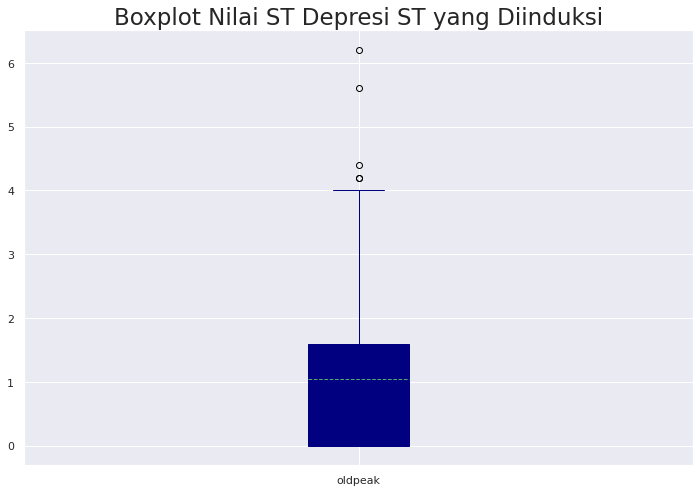

In [70]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['oldpeak'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai ST Depresi ST yang Diinduksi', fontsize=23)
plt.show()

In [72]:
slope_count = df['slope'].value_counts()
print(slope_count)

2    142
1    140
0     21
Name: slope, dtype: int64


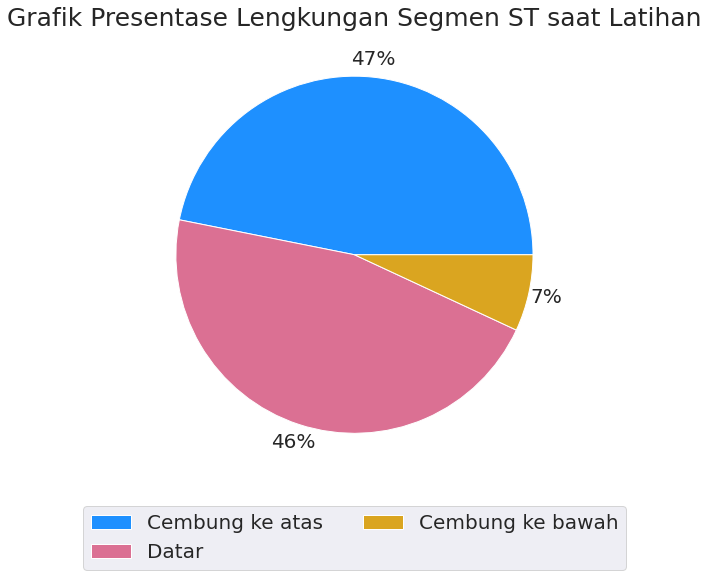

In [75]:
plt.figure(figsize=(8,9))
plt.pie(slope_count, colors=['dodgerblue','palevioletred','goldenrod'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Lengkungan Segmen ST saat Latihan',fontsize=25)
plt.legend(labels=['Cembung ke atas','Datar','Cembung ke bawah'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

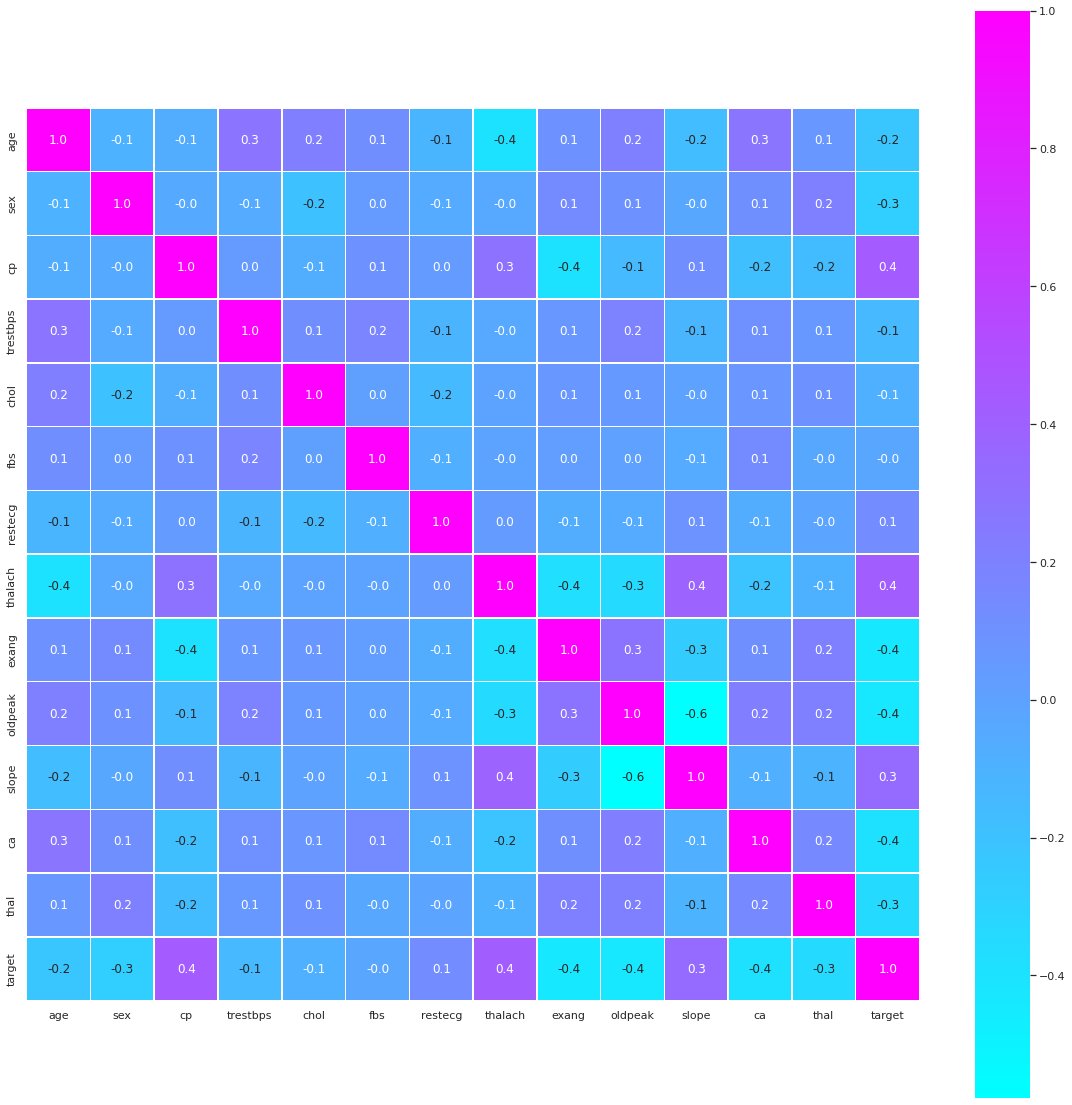

In [ ]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="cool", linewidths=.5, ax=ax);

Dari grafik heatmap, tidak terdapat adanya nilai yang menunjukkan hubungan yang linear antara semua variabel independen dengan variabel dependen yaitu target

# Preprocessing

Sebelum pemodelan, data dibagi ke dalam variabel x dan y. X merupakan semua variabel bebas dan y merupakan target dengan 0 adalah negatif penyakit jantung dan 1 adalah positif penyakit jantung. 

Pembagian data training dan data testing dengan komposisi 30% data testing dan 70% data training

In [ ]:
# membuat variabel x dan y
x = df.drop(columns='target')
y = df['target']

In [ ]:
# split data menjadi data training dan data test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

In [ ]:
print(f"Train features: {x_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Test features: {x_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (227, 13)
Train target: (227,)
Test features: (76, 13)
Test target: (76,)


# Pembuatan model

Pembuatan model klasifikasi akan dilakukan dengan model *Decision Tree, Random Forest, K-Nearest Neighbors, Logistic Regression dan Naive Bayes *. Di akhir pengerjaan akan ada proses evaluasi model dengan menunjukkan Accuracy, Confusion Matrix, Precision and Recall beserta F1 score.
Setelah pengerjaan semua model selesai, akan ada juga perbandingan tingkat akurasi dari tiap model.

1. Akurasi


*   Akurasi menyatakan rasio ketepatan prediksi dari total keseluruhan prediksi
*   Akurasi = (Prediksi benar/total prediksi) x 100%

2. Confusion matrix


*   Rincian benar dan salah dalam setiap kelas
*   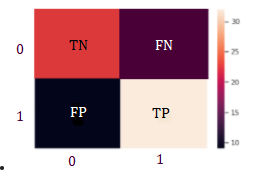


a. TP (True Positive) = Pasien yang positif berpenyakit jantung dan masuk ke kelas penyakit jantung

b. TN (True Negative) = Pasien yang tidak berpenyakit jantung dan dinyatakan tidak berpenyakit jantung

c. FP (False Positive) = Pasien yang tidak berpenyakit jantung namun dinyatakan berpenyakit jantung

d. FN (False Negative) = Pasien yang berpenyakit jantung namun dinyatakan tidak berpenyakit jantung
 
  
   

3. Precision and Recall 

a. Precision menyatakan proporsi data yang diprediksi positif tepat berlabel positif

b. Recall = Menyatakan proporsi data aktual berlabel positif tepat diprediksi positif oleh model


 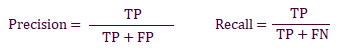

4. F1 Score = 
Menunjukkan keseimbangan antara precision and recall

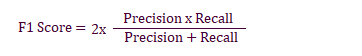




## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [ ]:
dt_pred = dtc.predict(x_test)

In [ ]:
from sklearn import metrics
dtscore = metrics.accuracy_score(y_test , dt_pred)
print('Model accuracy Decision Tree : ' , dtscore)

Model accuracy Decision Tree :  0.6973684210526315


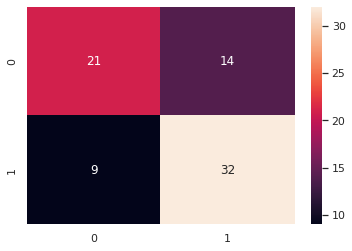

In [ ]:
from sklearn.metrics import confusion_matrix

cmdt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cmdt, annot=True)

Dari 76 data test, 32 data positif terprediksi positif, 9 data negatif terprediksi positif, 14 data negatif terprediksi positif, 21 data negatif terprediksi negatif

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.70      0.78      0.74        41

    accuracy                           0.70        76
   macro avg       0.70      0.69      0.69        76
weighted avg       0.70      0.70      0.69        76



In [ ]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Decision Tree'] = dt_pred.flatten()
hasil_prediksi['Decision Tree'] = hasil_prediksi['Decision Tree'].round(0)
hasil_prediksi.head()

,Aktual,Decision Tree
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rfc.predict(x_test)

In [ ]:
rfscore = metrics.accuracy_score(y_test , rf_pred)
print('Model accuracy Random Forest : ' , rfscore)

Model accuracy Random Forest :  0.7631578947368421


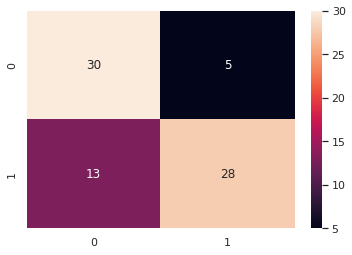

In [ ]:
cmrf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cmrf, annot=True)

Dari 76 data test, 28 data positif terprediksi positif, 13 data negatif terprediksi positif, 5 data negatif terprediksi positif, 30 data negatif terprediksi negatif

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.85      0.68      0.76        41

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



In [ ]:
hasil_prediksi['Random Forest'] = rf_pred.flatten()
hasil_prediksi['Random Forest'] = hasil_prediksi['Random Forest'].round(0)
hasil_prediksi.head(5)

,Aktual,Decision Tree,Random Forest
0,0,0,0
1,0,1,0
2,1,1,1
3,1,1,1
4,1,1,1


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(max_iter=np.inf)
lrc.fit(x_train, y_train)

LogisticRegression(max_iter=inf)

In [ ]:
lr_pred = lrc.predict(x_test)

In [ ]:
lrscore = metrics.accuracy_score(y_test , lr_pred)
print('Model accuracy Logistic Regression : ' , lrscore)

Model accuracy Logistic Regression :  0.7631578947368421


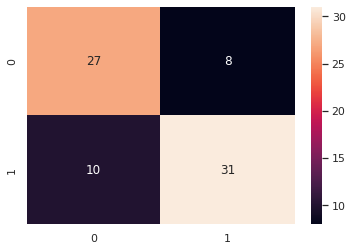

In [ ]:
cmlr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cmlr, annot=True)

Dari 76 data test, 31 data positif terprediksi positif, 10 data negatif terprediksi positif, 8 data negatif terprediksi positif, 27 data negatif terprediksi negatif

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        35
           1       0.79      0.76      0.77        41

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



In [ ]:
hasil_prediksi['Logistic Regression'] = lr_pred.flatten()
hasil_prediksi['Logistic Regression'] = hasil_prediksi['Logistic Regression'].round(0)
hasil_prediksi.head()

,Aktual,Decision Tree,Random Forest,Logistic Regression
0,0,0,0,0
1,0,1,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


## Naive Bayes

In [ ]:
# Import model gaussian

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbtrain = nbc.fit(x_train, y_train)

In [ ]:
# prediksi
nb_pred = nbtrain.predict(x_test)

In [ ]:
#cek akurasi
nbscore = metrics.accuracy_score(y_test , nb_pred)
print('Model accuracy Naive Bayes : ' , nbscore)

Model accuracy Naive Bayes :  0.8026315789473685


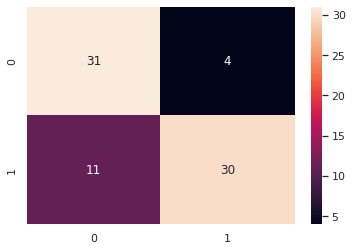

In [ ]:
cmnb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cmnb, annot=True)

Dari 76 data test, 30 data positif terprediksi positif, 11 data negatif terprediksi positif, 4 data negatif terprediksi positif, 31 data negatif terprediksi negatif

In [ ]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.88      0.73      0.80        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.82      0.80      0.80        76



In [ ]:
hasil_prediksi['Naive Bayes'] = nb_pred.flatten()
hasil_prediksi['Naive Bayes'] = hasil_prediksi['Naive Bayes'].round(0)
hasil_prediksi.head()

,Aktual,Decision Tree,Random Forest,Logistic Regression,Naive Bayes
0,0,0,0,0,0
1,0,1,0,0,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knnclass = KNeighborsClassifier(n_neighbors = k)
knnclass.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# prediksi
knn_pred = knnclass.predict(x_test)

In [ ]:
#cek akurasi
knnscore = metrics.accuracy_score(y_test , knn_pred)
print('Model accuracy K-Nearest Neighbors : ' , knnscore)

Model accuracy K-Nearest Neighbors :  0.6578947368421053


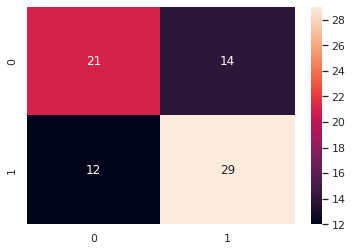

In [ ]:
cmknn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cmknn, annot=True)

Dari 76 data test, 29 data positif terprediksi positif, 12 data negatif terprediksi positif, 14 data negatif terprediksi positif, 21 data negatif terprediksi negatif

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        35
           1       0.67      0.71      0.69        41

    accuracy                           0.66        76
   macro avg       0.66      0.65      0.65        76
weighted avg       0.66      0.66      0.66        76



In [ ]:
hasil_prediksi['K-Nearest Neighbors'] = knn_pred.flatten()
hasil_prediksi['K-Nearest Neighbors'] = hasil_prediksi['K-Nearest Neighbors'].round(0)
hasil_prediksi.head()

,Aktual,Decision Tree,Random Forest,Logistic Regression,Naive Bayes,K-Nearest Neighbors
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,1,1,1,1,1,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1


# Perbandingan dari tiap model

In [ ]:
# perbandingan akurasi
print('Model accuracy Decision Tree : ' , dtscore)
print('Model Accuracy Random Forest:', rfscore)
print('Model accuracy Logistic Regression : ' , lrscore)
print('Model accuracy Naive Bayes : ' , nbscore)
print('Model accuracy K-Nearest Neighbors : ' , knnscore)

Model accuracy Decision Tree :  0.6973684210526315
Model Accuracy Random Forest: 0.7631578947368421
Model accuracy Logistic Regression :  0.7631578947368421
Model accuracy Naive Bayes :  0.8026315789473685
Model accuracy K-Nearest Neighbors :  0.6578947368421053


Di atas terlihat bahwa model dengan tingkat akurasi tertinggi adalah model Naive Bayes. Selanjutnya kita akan memprediksi menggunakan model Naive Bayes dengan beberapa parameter yang akan diinput(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

In [ ]:
age = input('Masukkan umur                            : ')
sex = input('Jenis kelamin (laki-laki=1, perempuan=0) : ')
cp = input('Chest pain type (0-3)                    : ')
trestbps = input('Resting blood pressure                   : ')
chol = input('Serum cholestoral                        : ')
fbs = input('Fasting blood sugar                      : ')
restecg = input('Resting electrocardiographic results     : ')
thalach = input('Maximum heart rate achieved              : ')
exang = input('Exercise induced angina                  : ')
oldpeak = input('ST depression induced by exercise relative to rest: ')
slope = input('Slope of the peak exercise ST segment    : ')
ca = input('Number of major vessels                  : ')
thal = input('Thal                                     : ')

pred = nbc.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])

if pred==1:
  print('\n Anda terprediksi berpenyakit jantung\n')
else:
  print('\n Anda terprediksi tidak berpenyakit jantung\n')

Masukkan umur                            : 25
Jenis kelamin (laki-laki=1, perempuan=0) : 0
Chest pain type (0-3)                    : 0
Resting blood pressure                   : 180
Serum cholestoral                        : 300
Fasting blood sugar                      : 0
Resting electrocardiographic results     : 0
Maximum heart rate achieved              : 180
Exercise induced angina                  : 0
ST depression induced by exercise relative to rest: 3
Slope of the peak exercise ST segment    : 0
Number of major vessels                  : 0
Thal                                     : 1

 Anda terprediksi tidak berpenyakit jantung



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
